In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
ds_co = pd.read_csv('Transformed Data/Transformed_Co', index_col = 0)
ds_pt = pd.read_csv('Transformed Data/Transformed_Pt' , index_col = 0)


In [3]:
ds_co.shape

(92, 133)

In [4]:
# ds_co = ds_co.iloc[:, 1:-2]
# ds_pt = ds_pt.iloc[:, 1:-2]

In [5]:
# poly = PolynomialFeatures(degree=2)
# ds_co_poly = poly.fit_transform(ds_co)
# ds_pt_poly = poly.fit_transform(ds_pt)
ds_co_poly = ds_co
ds_pt_poly = ds_pt


In [6]:
# poly.get_feature_names(ds_co.columns)[150]

<IPython.core.display.Javascript object>


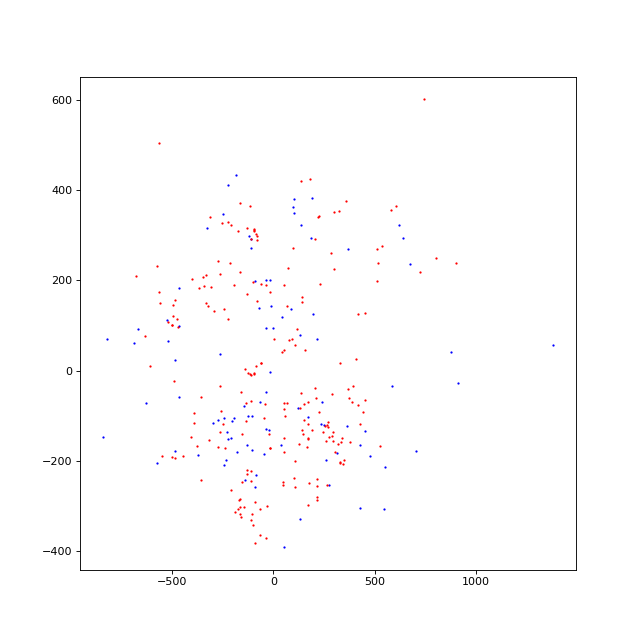

In [7]:
fig1, subaxes = plt.subplots(1, 1, figsize=(8,8))

pca1 = decomposition.PCA(n_components=2)
ds_co_poly_pca = pca1.fit_transform(ds_co_poly)
ds_pt_poly_pca = pca1.fit_transform(ds_pt_poly)
# ds_co_poly_pca = pca.transform(ds_co_poly)
subaxes.scatter(ds_co_poly_pca[:, 0], ds_co_poly_pca[:, 1],  c='blue' ,s=1)
subaxes.scatter(ds_pt_poly_pca[:, 0], ds_pt_poly_pca[:, 1],  c='red' ,s=1)


In [8]:
ds_co_poly_pca.shape

(92, 2)

In [9]:
df_co = pd.DataFrame(ds_co_poly_pca)
df_pt = pd.DataFrame(ds_pt_poly_pca)


In [10]:
df_pca1 = pd.DataFrame(pca1.components_)
df_pca1

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,-2.706819e-18,-0.012017,-0.003469,-0.006008,-0.006008,4.229964e-12,-1.871212e-12,-5.421011e-20,0.201040,0.051893,...,0.201511,0.000020,-0.000033,0.000041,0.478489,0.147593,0.223676,0.163845,0.000001,-0.000003
1,1.221144e-17,0.013770,0.003975,0.006885,0.006885,-1.533679e-11,-1.602437e-12,-8.673617e-19,-0.331214,-0.136964,...,-0.026610,-0.000067,-0.000130,0.000068,0.010186,-0.002784,0.097781,0.003681,-0.000117,-0.000108


In [11]:
pd.DataFrame(pca1.components_).apply((lambda x: x.max()), axis=1)

0    0.529542
1    0.334606
dtype: float64

In [12]:
pd.DataFrame(pca1.components_).apply((lambda x: x.argmax()), axis=1)

0    120
1     36
dtype: int64

In [13]:
pca1.explained_variance_

array([92496.40431595, 45511.56799174])

<IPython.core.display.Javascript object>


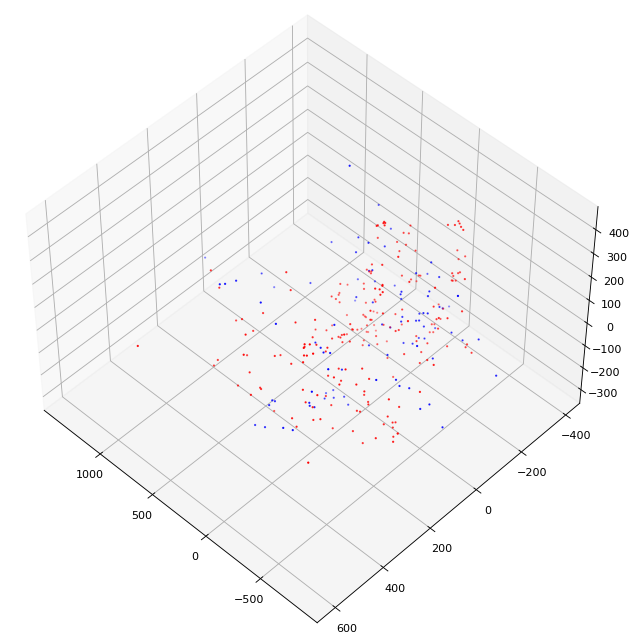

In [14]:
fig = plt.figure(figsize=(8,8))

subaxes1 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
pca = decomposition.PCA(n_components=3)
ds_co_poly_pca2 = pca.fit_transform(ds_co_poly)
ds_pt_poly_pca2 = pca.fit_transform(ds_pt_poly)

subaxes1.scatter(ds_co_poly_pca2[:, 0], ds_co_poly_pca2[:, 1], ds_co_poly_pca2[:, 2],  c='blue' ,s=1)
subaxes1.scatter(ds_pt_poly_pca2[:, 0], ds_pt_poly_pca2[:, 1], ds_pt_poly_pca2[:, 2],  c='red' ,s=1)



In [15]:
print(pca.explained_variance_ )

[92496.40431595 45511.56799174 17525.07129363]


In [16]:
ds_co.shape

(92, 133)

In [17]:
df_co.to_csv('PCA/PCA_Co_final.csv')
df_pt.to_csv('PCA/PCA_Pt_final.csv')

In [18]:
df_pca1.to_csv('Significant2d/final.csv')